In [1]:
#Importing all the required libraries

import pandas as pd
import matplotlib.pylab as plt


In [3]:
#Loading the dataset
Univ1 = pd.read_excel("University_Clustering.xlsx")

In [7]:
#Using the describe function to to view the count, mean, std, min, max values of the data
Univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
#Using the info function to check data type and null count values of the data
Univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [8]:
#Dropping the unnessary columns from the dataset
Univ = Univ1.drop(["State"], axis=1)

In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)


In [10]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:, 1:])
df_norm.describe()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Importing the libraries required for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [12]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

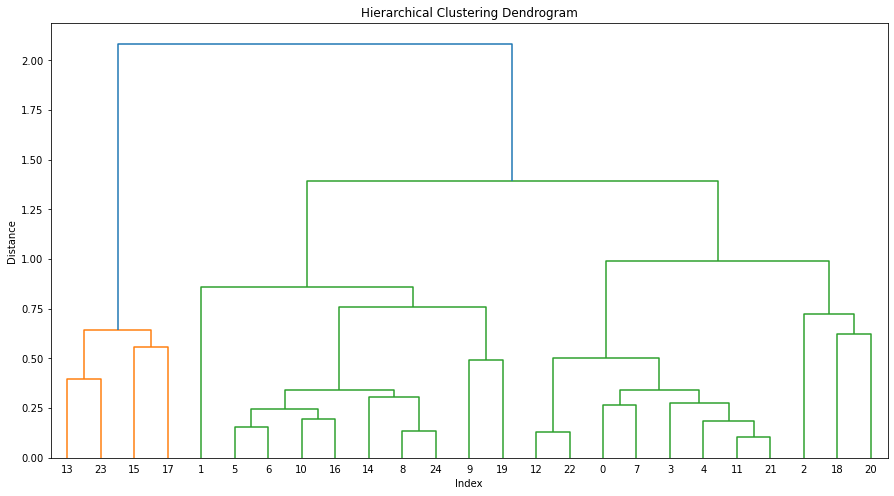

In [13]:
# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [14]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

Univ['clust'] = cluster_labels # creating a new column and assigning it to new column 

Univ1 = Univ.iloc[:, [7,0,1,2,3,4,5,6]]
Univ1.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [15]:
# Aggregate mean of each cluster
Univ1.iloc[:, 2:].groupby(Univ1.clust).mean()



,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [16]:
# creating a csv file 
Univ1.to_csv("University.csv", encoding = "utf-8")



In [17]:
import os
os.getcwd()

'C:\\Users\\ashis'